# Principal Component Analysis
(since I never had an exercise to practice)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Scikit-learn Datasets 
We're going to learn about the different default sklearn datasets for classification.

In [5]:
# breast cancer, digits, wine
from sklearn.datasets import load_breast_cancer,load_digits,load_wine
cancer = load_breast_cancer()
digits = load_digits()
wine = load_wine()

In [14]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [16]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [18]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [20]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Each of the images in the digits dataset is used as a reference for digits 0-9. Each "attribute" corresponds to a pixel, so the 8x8 image has 64 pixels >> 64 attributes.

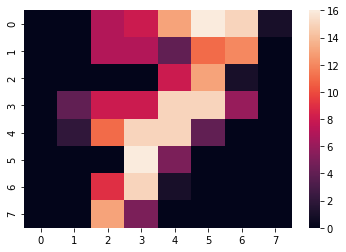

In [31]:
sns.heatmap(digits['images'][7])

Now let's check out the wine data set.

In [29]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [28]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [32]:
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [34]:
print(wine['data'])

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Let's go with the wine data, as we've never seen it before, unlike the cancer data.

## Principal Component Analysis
Let's see if we can eliminate some of the factors for ease of classification using another ML model.

In [7]:
df = pd.DataFrame(wine['data'],columns = wine['feature_names'])

In [38]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##### Step 1: Scale data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
dfs = scaler.transform(df)
dfs = pd.DataFrame(dfs,columns = wine['feature_names'])
dfs.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Now every feature has been standardized to unit variance.

##### Step 2: PCA

In [10]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(dfs)
df2 = pca2.transform(dfs)
print(df2)
#df2 = transforming my original data set into a linear transformation,
# expressed in terms of the 2 PCs

pca_test = PCA(n_components=7)
pca_test.fit(dfs)
dfp = pca_test.transform(dfs)

#print(pca2.components_)
#print(pca2.explained_variance_)

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]
 [ 3.47973668 -1.30233324]
 [ 1.7547529  -0.61197723]
 [ 2.11346234 -0.67570634]
 [ 3.45815682 -1.13062988]
 [ 4.31278391 -2.09597558]
 [ 2.3051882  -1.66255173]
 [ 2.17195527 -2.32730534]
 [ 1.89897118 -1.63136888]
 [ 3.54198508 -2.51834367]
 [ 2.0845222  -1.06113799]
 [ 3.12440254 -0.78689711]
 [ 1.08657007 -0.24174355]
 [ 2.53522408  0.09184062]
 [ 1.64498834  0.51627893]
 [ 1.76157587  0.31714893]
 [ 0.9900791  -0.94066734]
 [ 1.77527763 -0.68617513]
 [ 1.23542396  0.08980704]
 [ 2.18840633 -0.68956962]
 [ 2.25610898 -0.19146194]
 [ 2.50022003 -1.24083383]
 [ 2.67741105 -1.47187365]
 [ 1.62857912 -0.05270445]
 [ 1.90269086 -1.63306043]
 [ 1.41038853 -0.69793432]
 [ 1.90382623 -0.17671095]
 [ 1.38486223 -0.65863985]
 

Text(0.5, 1.0, 'PCA Scree Plot')

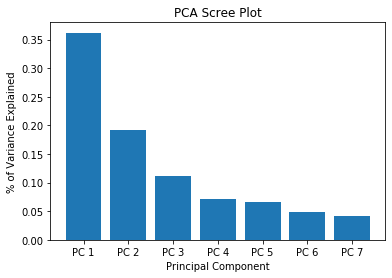

In [100]:
cols = []
pc_range = range(1,len(pca_test.explained_variance_ratio_)+1)
for i in pc_range:
    cols.append('PC '+ str(i))
plt.bar(x=pc_range,height=pca_test.explained_variance_ratio_,tick_label=cols)
plt.xlabel('Principal Component')
plt.ylabel('% of Variance Explained')
plt.title('PCA Scree Plot')

          0         1         2         3         4         5         6  \
0  0.144329 -0.245188 -0.002051 -0.239320  0.141992  0.394661  0.422934   
1 -0.483652 -0.224931 -0.316069  0.010591 -0.299634 -0.065040  0.003360   

          7         8         9        10        11        12  
0 -0.298533  0.313429 -0.088617  0.296715  0.376167  0.286752  
1 -0.028779 -0.039302 -0.529996  0.279235  0.164496 -0.364903  


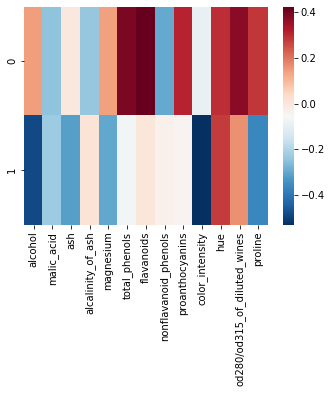

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(pca2.components_,cmap='RdBu_r',xticklabels=dfs.columns)
pca2_df = pd.DataFrame(pca2.components_)
print(pca2_df)

#plt.subplot(1,2,2)
#ns.heatmap(pca3.components_,cmap='RdBu_r',xticklabels=dfs.columns)

The way to interpret this is: the biggest factors in principal component 0, along which most of the variation occurs, are flavonoids, total_phenols, and od280/od315 of diluted wines. If there were strong negative correlations for certain factors, we'd include them as well. The subsequent analysis of the original dataset would then focus on the effects of flavonoids, total_phenols, and od280/od315 of diluted wines, throwing out factors like color_intensity or ash, for example.

(Read through Ch. 12 ISL to learn about how to interpret the output of this.)

Practicing LaTeX: $e^{i\pi} + 1 = 0$